In [1]:
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns 
from sqlalchemy import create_engine
from pathlib import Path

In [6]:
db_path = Path("../data/weather.db")
engine = create_engine(f"sqlite:///{db_path}")

df_clean = pd.read_sql_table("weather_clean", engine)
df_daily = pd.read_sql_table("weather_daily", engine)
df_stats = pd.read_sql_table("weather_city_stats", engine)

#df_clean.info()

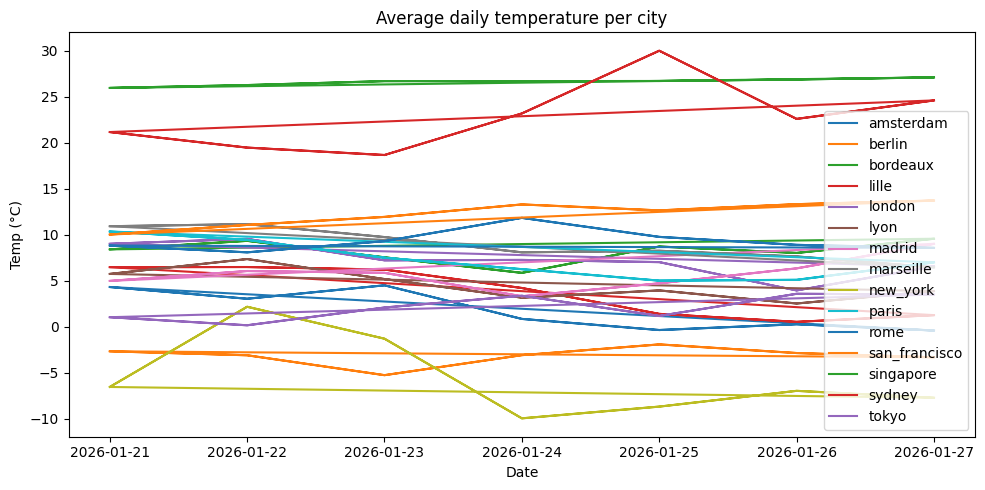

In [9]:
plt.figure(figsize=(10,5))

for city in df_daily["city"].unique():
  subset = df_daily[df_daily["city"] == city]
  plt.plot(subset["date"], subset["temp_avg"], label=city)

plt.title("Average daily temperature per city")
plt.xlabel("Date")
plt.ylabel("Temp (°C)")
plt.legend()
plt.tight_layout()
plt.show()

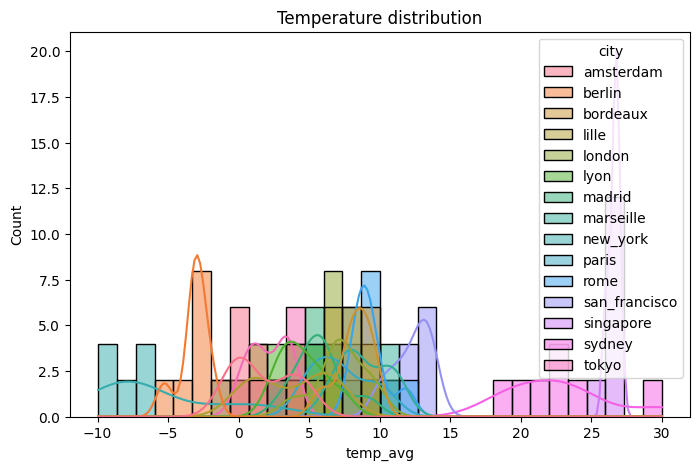

In [10]:
plt.figure(figsize=(8,5))
sns.histplot(data=df_daily,x="temp_avg",hue="city",bins=30,kde=True)
plt.title("Temperature distribution")
plt.show()

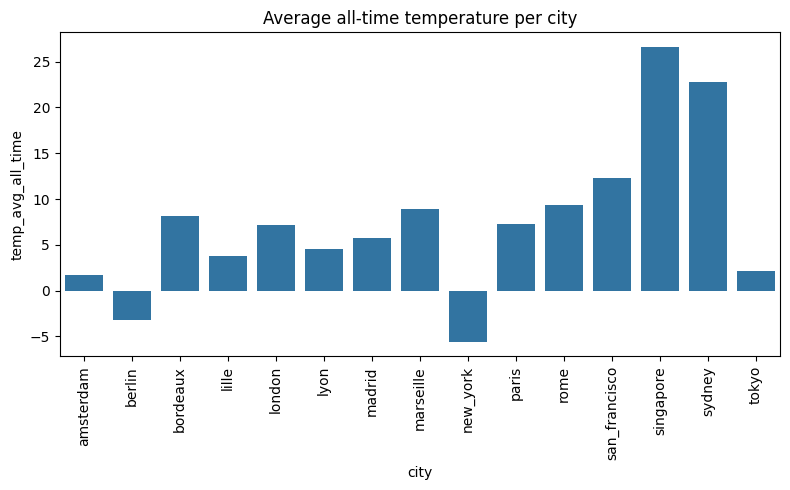

In [26]:
plt.figure(figsize=(8,5))
sns.barplot(data=df_stats,x="city",y="temp_avg_all_time")
plt.title("Average all-time temperature per city")
plt.xticks(rotation="vertical")
plt.tight_layout()
plt.show()

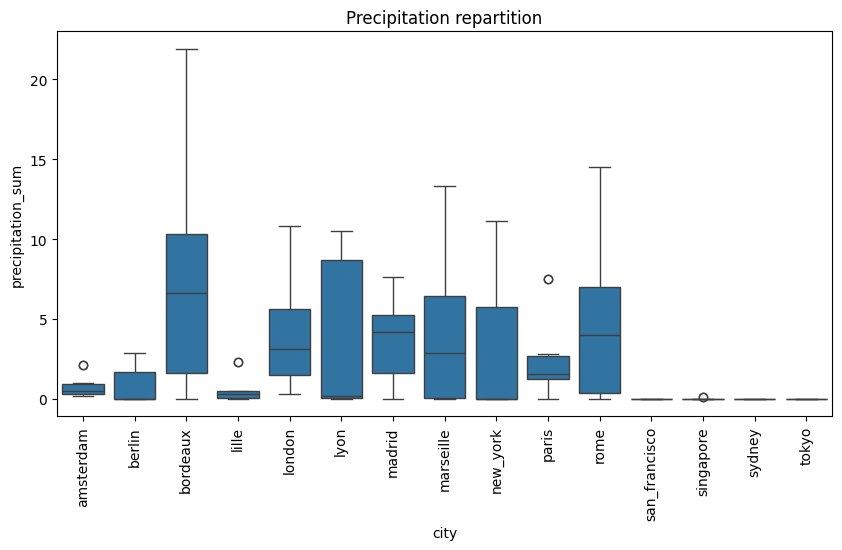

In [32]:
plt.figure(figsize=(10,5))
sns.boxplot(data=df_daily,x="city",y="precipitation_sum")
plt.xticks(rotation="vertical")
plt.title("Precipitation repartition")
plt.show()

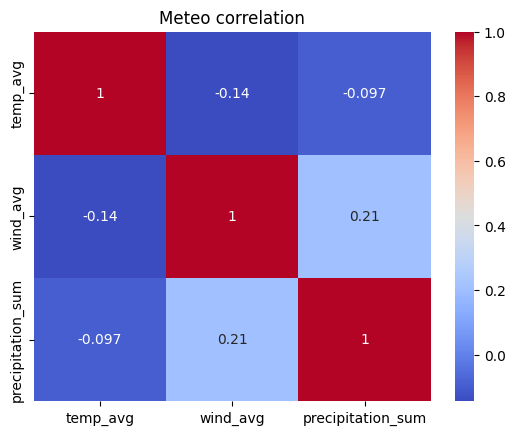

In [28]:
features = ["temp_avg", "wind_avg", "precipitation_sum"]
corr = df_daily[features].corr()

sns.heatmap(corr, annot=True, cmap="coolwarm")
plt.title("Meteo correlation")
plt.show()